# TSF - Task2 - To Explore Supervised Machine Learning# 

### In this regression task we will predict the percentage of marks that a student is expected to score based upon thenumber of hours they studied.This is a simple linear regression task as it involves just two variables.

### Data can be be found at http://bit.ly/w-data 

### What will be predicted score if a student study for 9.25 hrs in a day? 

# Importing all the required libraries 

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Importing data

In [5]:
data=pd.read_csv('student_scores.csv')

# To see the first five rows

In [6]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Checking datatypes

In [9]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Pulling the  statistical information from the given data

In [11]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Checking for null value and missing value

In [12]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

# Checking for corelation between two variables

In [15]:
corr=data.corr()

In [16]:
corr

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Plotting data

Text(0, 0.5, 'Percentage Score')

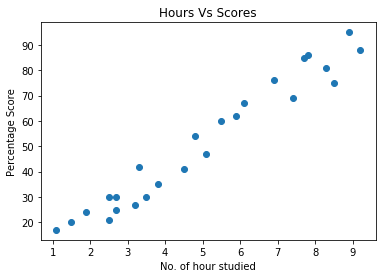

In [19]:
x=data['Hours']
y=data['Scores']
plt.scatter(x,y)
plt.title('Hours Vs Scores')
plt.xlabel('No. of hour studied')
plt.ylabel('Percentage Score')

# Splitting the dataset into training and testing set

In [20]:
x=data[['Hours']].values
y=data[['Scores']].values

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Training the data using linear regression model

In [23]:
from sklearn.linear_model import LinearRegression
training=LinearRegression()
training.fit(x_train,y_train)
print('Training Complete!')

Training Complete!


# Plotting the regression line

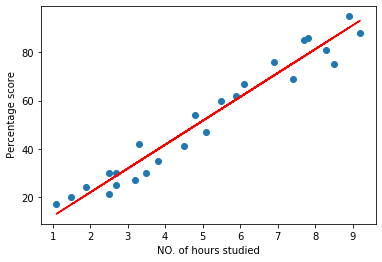

In [25]:
line= training.coef_*x+training.intercept_
plt.scatter(x,y)
plt.plot(x,line, c='red');
plt.xlabel("NO. of hours studied")
plt.ylabel(" Percentage score")
plt.show()

# Making predictions

In [26]:
print("Training score")
print(training.score(x_train, y_train))
print("Test score")
print(training.score(x_test, y_test))

Training score
0.9515510725211553
Test score
0.9454906892105356


In [27]:
y_pred = training.predict(x_test)

In [28]:
y_pred

array([[16.88414476],
       [33.73226078],
       [75.357018  ],
       [26.79480124],
       [60.49103328]])

# Answer

### What will be predicted score if a student study for 9.25 hrs in a day?

In [29]:
hrs = 9.25
own_pred = training.predict([[hrs]])
print("No of Hours studied :", format(hrs))
print("Predicted score :",format(own_pred[0]))

No of Hours studied : 9.25
Predicted score : [93.69173249]


# Evaluation of model accuracy

In [30]:
# Finding error rate
from sklearn import metrics
print("MAE :",metrics.mean_absolute_error(y_test, y_pred))
print("MSE :",metrics.mean_squared_error(y_test, y_pred))
print("RMSE :",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE : 4.183859899002975
MSE : 21.5987693072174
RMSE : 4.6474476121003665
